In [36]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
def title_categorical(df):
    df['Title'] = [i.split(".")[0].split(",")[-1].strip() for i in df["Name"]]
    df['Title'].loc[(df['Title'] == 'Miss')& (df['SibSp']>0)] = 'Ms'
    df['Title'] = df['Title'].replace(['Master','Dr','Rev','Mlle','Major','Col','Don','Mme','Lady','Sir','Capt','the Countess','Jonkheer'],'Others')
    df1 = df.drop(['Name','Cabin','Ticket'],axis=1)
    return df1

new_data = title_categorical(data)
new_data['Title'].value_counts()

/tmp/ipykernel_12639/483204426.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Title'].loc[(df['Title'] == 'Miss')& (df['SibSp']>0)] = 'Ms'
/tmp/ipykernel_12639/483204426.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

Title
Mr        517
Mrs       125
Miss      123
Others     66
Ms         60
Name: count, dtype: int64

In [38]:
def family_size(df):
    df['family_size'] = df['SibSp'] + df['Parch']
    df1 = df.drop(['SibSp','Parch'],axis=1)
    return df1

new_data = family_size(new_data)
new_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,family_size
0,1,0,3,male,22.0,7.2500,S,Mr,1
1,2,1,1,female,38.0,71.2833,C,Mrs,1
2,3,1,3,female,26.0,7.9250,S,Miss,0
3,4,1,1,female,35.0,53.1000,S,Mrs,1
4,5,0,3,male,35.0,8.0500,S,Mr,0
5,6,0,3,male,NaN,8.4583,Q,Mr,0
6,7,0,1,male,54.0,51.8625,S,Mr,0
7,8,0,3,male,2.0,21.0750,S,Others,4
8,9,1,3,female,27.0,11.1333,S,Mrs,2
9,10,1,2,female,14.0,30.0708,C,Mrs,1


In [39]:
def family_category(df):
    df['Alone'] = (df['family_size']==0).astype(int)
    df['Small_family'] = (df['family_size']==1).astype(int)
    df['Medium_family'] = (df['family_size']==2).astype(int)
    df['Large_family'] = (df['family_size']>=3).astype(int)
    df = df.drop('family_size',axis=1)
    return df

new_data = family_category(new_data)
new_data['Title'].value_counts()

Title
Mr        517
Mrs       125
Miss      123
Others     66
Ms         60
Name: count, dtype: int64

In [40]:
def encode_gender(df):
    df.loc[new_data['Sex']=='male','Sex'] = 1
    df.loc[new_data['Sex']=='female','Sex'] = 0
    return df

new_data = encode_gender(new_data)
new_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Small_family,Medium_family,Large_family
0,1,0,3,1,22.0,7.2500,S,Mr,0,1,0,0
1,2,1,1,0,38.0,71.2833,C,Mrs,0,1,0,0
2,3,1,3,0,26.0,7.9250,S,Miss,1,0,0,0
3,4,1,1,0,35.0,53.1000,S,Mrs,0,1,0,0
4,5,0,3,1,35.0,8.0500,S,Mr,1,0,0,0
5,6,0,3,1,NaN,8.4583,Q,Mr,1,0,0,0
6,7,0,1,1,54.0,51.8625,S,Mr,1,0,0,0
7,8,0,3,1,2.0,21.0750,S,Others,0,0,0,1
8,9,1,3,0,27.0,11.1333,S,Mrs,0,0,1,0
9,10,1,2,0,14.0,30.0708,C,Mrs,0,1,0,0


<Axes: xlabel='Age', ylabel='Count'>

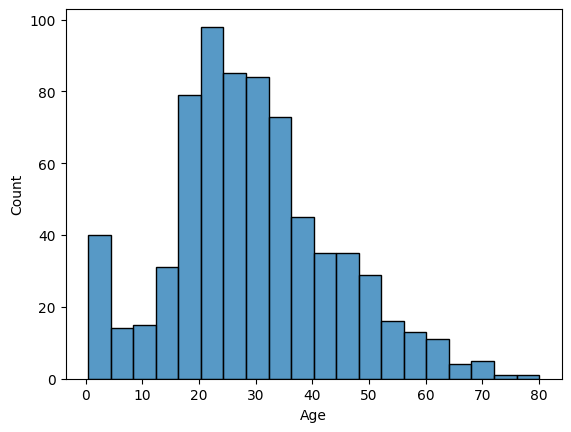

In [41]:
import seaborn as sns
sns.histplot(x='Age',data=new_data)

In [42]:
import numpy as np
def missing_age(df):
    missing_indices = df['Age'].isnull()
    random_value = np.random.randint(30,71,size=missing_indices.sum())
    df.loc[missing_indices,'Age'] = random_value
    df.isnull().sum()
    return df

new_data1 = missing_age(new_data)
new_data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         2
Title            0
Alone            0
Small_family     0
Medium_family    0
Large_family     0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

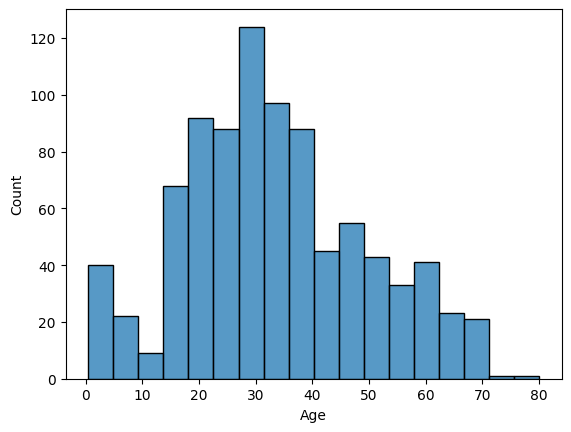

In [43]:
sns.histplot(x='Age',data=new_data1)

In [44]:
new_data1['Title'].value_counts()

Title
Mr        517
Mrs       125
Miss      123
Others     66
Ms         60
Name: count, dtype: int64

In [45]:
new_data1 = new_data1.loc[new_data1['Age']<70]
new_data1['Age'].loc[(new_data1['Age']<1)] = 1
new_data1['Title'].value_counts()

/tmp/ipykernel_12639/870236072.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data1['Age'].loc[(new_data1['Age']<1)] = 1
/tmp/ipykernel_12639/870236072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Title
Mr        510
Mrs       124
Miss      123
Others     65
Ms         59
Name: count, dtype: int64

In [46]:
new_data1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Small_family,Medium_family,Large_family
0,1,0,3,1,22.0,7.2500,S,Mr,0,1,0,0
1,2,1,1,0,38.0,71.2833,C,Mrs,0,1,0,0
2,3,1,3,0,26.0,7.9250,S,Miss,1,0,0,0
3,4,1,1,0,35.0,53.1000,S,Mrs,0,1,0,0
4,5,0,3,1,35.0,8.0500,S,Mr,1,0,0,0
5,6,0,3,1,58.0,8.4583,Q,Mr,1,0,0,0
6,7,0,1,1,54.0,51.8625,S,Mr,1,0,0,0
7,8,0,3,1,2.0,21.0750,S,Others,0,0,0,1
8,9,1,3,0,27.0,11.1333,S,Mrs,0,0,1,0
9,10,1,2,0,14.0,30.0708,C,Mrs,0,1,0,0


In [47]:
def object_to_numeric(df):
    new_data12 = new_data1.copy()
    title_data = pd.get_dummies(new_data12['Title'],dtype=float)
    new_data12 = pd.concat([new_data12,title_data],axis=1)
    embarked_data = pd.get_dummies(new_data12['Embarked'],dtype=float)
    new_data12 = pd.concat([new_data12,embarked_data],axis=1)
    new_data12 = new_data12.drop(['Embarked','Title'],axis=1)
    return new_data12

new_data1 = object_to_numeric(new_data1)
new_data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Alone            0
Small_family     0
Medium_family    0
Large_family     0
Miss             0
Mr               0
Mrs              0
Ms               0
Others           0
C                0
Q                0
S                0
dtype: int64

In [48]:
new_data1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Small_family,Medium_family,Large_family,Miss,Mr,Mrs,Ms,Others,C,Q,S
0,1,0,3,1,22.0,7.2500,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,0,38.0,71.2833,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,26.0,7.9250,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,0,35.0,53.1000,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,1,35.0,8.0500,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,1,58.0,8.4583,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,0,1,1,54.0,51.8625,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,0,3,1,2.0,21.0750,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,9,1,3,0,27.0,11.1333,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,1,2,0,14.0,30.0708,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Fare'>

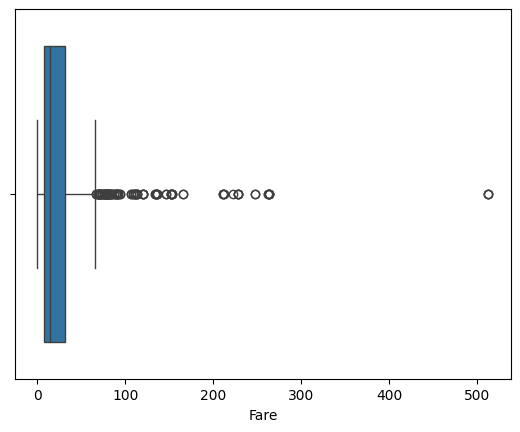

In [70]:
sns.boxplot(x='Fare',data=new_data1)

In [72]:
new_data2 = new_data1.loc[(new_data1['Fare']>0)&(new_data1['Fare']<=50)]
new_data2.shape

(708, 18)

<Axes: xlabel='Fare'>

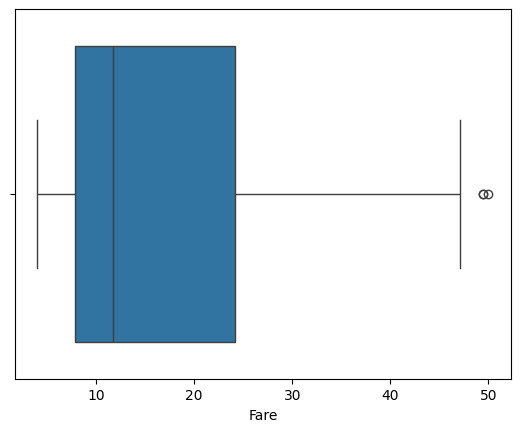

In [73]:
sns.boxplot(x='Fare',data=new_data2)

In [74]:
from sklearn.model_selection import train_test_split
x = new_data2.drop('Survived',axis=1)
y = new_data2['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [85]:
logreg.score(x_test,y_test)

0.823943661971831

In [86]:
logreg.score(x_train,y_train)

0.8144876325088339